<a href="https://colab.research.google.com/github/rushilg99/BayesianInference/blob/master/BayesianExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# In the 2019/20 academic year, I took Prof. Wilfrid Kendall's course on Mathematical Statistics at the University of Warwick
# This course focused on statistical inference from the perspective of a frequentist.
# In this notebook, I take the numerous examples that Wilfrid gave and see what happens when I consider them as a bayesian.
# The main reason that I am doing this is to visualise how priors change upon seeing new evidence (and it can only help my python!)

import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import scipy.stats as stats

ϴ is the true population proportion of the number of people who carry a genetic marker



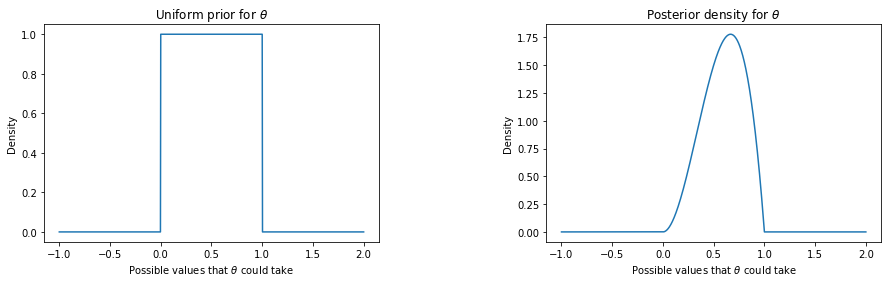


Posterior mode: 0.6666666666666667
The maximum likelihood estimate for ϴ is 2/3, which matches with the mode of our posterior distribution, as expected.


In [46]:
# (1a) What proportion theta of a hominid population carry a certain genetic marker?
#      Suppose we have tested 3 people x_1 = 1, x_2 = 1, x_3 = 0.
#      Model each as observations of iid X_i ~ Bern(theta) random variables

#      Maximum likelihood estimate for theta is 2/3.
#      I choose a uniform prior for theta, since I don't have any prior preferences or knowledge.

print("\u03F4 is the true population proportion of the number of people who carry a genetic marker\n")
data = np.asarray([1,1,0])
dom = np.linspace(-1,2,num=1000)

# Prior

fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
plt.title(r"Uniform prior for $\theta$")
plt.plot(dom,stats.uniform.pdf(dom))
plt.ylabel("Density")
plt.xlabel(r"Possible values that $\theta$ could take")

# Posterior
#          Use definition of conditional density p(theta|y)=p(y|theta)p(theta)/p(y).
#          p(y) is a normalisation factor, so I can disregard this and use the trapezium rule later to normalise.
#          p(theta) is the density of our prior, which we already know.
#          p(y|theta) = P(X_1=1,X_2=1,X_3=0|theta) = P(X_1=1|theta)P(X_2=1|theta)P(X_3=0|theta)

likelihood = np.asarray([stats.bernoulli.pmf(data,theta_) if (theta_ >= 0 and theta_ <= 1) else np.zeros(3) for theta_ in dom]).prod(axis=1)

fig.add_subplot(122)
plt.title(r"Posterior density for $\theta$")
plt.plot(dom,stats.uniform.pdf(dom)*likelihood/np.trapz(stats.uniform.pdf(dom)*likelihood,dom))
plt.ylabel("Density")
plt.xlabel(r"Possible values that $\theta$ could take")

fig.subplots_adjust(wspace=0.5)
plt.show()
print("\nPosterior mode:", dom[np.argmax(stats.uniform.pdf(dom)*likelihood/np.trapz(stats.uniform.pdf(dom)*likelihood,dom))])
print("The maximum likelihood estimate for \u03F4 is 2/3, which matches with the mode of our posterior distribution, as expected.")